In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv

In [43]:
def mcc1d(M, a, flag):
    '''
    Monte-Carlo method to compute the first two moments of a random variable Y=U^{-a},
    where U~Unif([0,1]) and a∈(−1,1).
    
    Parameters:
    M (int): number of samples
    a (float): coefficient in x^(-a)
    flag (int): 1 for CLT bounds, 2 for Chebyshev bounds with q=2, 3 for Chebyshev bounds with q=1/a
    
    Returns:
    y (ndarray): array of shape (2, M), where y[0, :] measures the error and y[1, :] is for confidence level
    '''
    q = 1 / a
    y = np.zeros((2, M))
    exact = 1 / (1 - a)
    delta = 0.05
    
    # Generate M samples of U
    Z = np.random.rand(M)
    
    # Compute the corresponding samples of Y
    X = 1 / Z**a
    
    # Compute sample mean and sample variance
    mean = np.cumsum(X) / np.arange(1, M + 1)
    varest = np.cumsum((X - mean)**2) / np.arange(1, M + 1)
    
    # Compute qth moment for Chebyshev bounds with q=1/a
    qmom = np.cumsum(np.abs(X - mean)**q) / np.arange(1, M + 1)
    
    # Compute absolute error from exact value
    err = np.abs(np.cumsum(X) / np.arange(1, M + 1) - exact)
    
    if flag == 1:
        # Confidence interval (CLT bounds)
        am = mean - erfinv(1 - delta) * np.sqrt(2) * np.sqrt(varest / np.arange(1, M + 1))
        bm = mean + erfinv(1 - delta) * np.sqrt(2) * np.sqrt(varest / np.arange(1, M + 1))
    elif flag == 2:
        # Confidence interval (Chebyshev bounds with q=2)
        am = mean - delta**(-1/2) * np.sqrt(varest / np.arange(1, M + 1))
        bm = mean + delta**(-1/2) * np.sqrt(varest / np.arange(1, M + 1))
    elif flag == 3:
        # Confidence interval (Chebyshev bounds with q=1/a)
        am = mean - delta**(-1/q) * qmom**(1/q) / np.arange(1, M + 1)**(1 - 1/q)
        bm = mean + delta**(-1/q) * qmom**(1/q) / np.arange(1, M + 1)**(1 - 1/q)
    else:
        print('Something is wrong!!')
        
    # Counts whether the exact mean is in [am, bm]
    y[0, :] = (bm > exact) * (am < exact)
    y[1, :] = err
    
    return y



In [44]:
def cconflevel(a, M, K):
    '''
    Computes the confidence level for Monte Carlo simulation with mcc1d function, 
    using either CLT bounds or Chebyshev bounds with q=2 or q=1/a.
    
    Parameters:
   
    Returns:
    None
    '''
    flag = 1
    import numpy as np
    y = np.zeros((2, M)) # y[0, :] measures the error, y[1, :] is for confidence level

    if a > 0.5:
        print('Variance does not exist!!')

    for k in range(K):
        y += mcc1d(M, a, flag)

    Np = 10
    import numpy as np
    Mp = np.arange(Np, M + 1, Np)
    yp = y[:, Np - 1::Np] / K

    M1, M2 = Mp[0], Mp[-1]

    import numpy as np

  
    plt.subplot(2, 1, 1)
    plt.loglog(Mp, yp[1, :], 'b', [M1, M2], yp[1, -1] * np.array([(M1 / M2)**-0.5, 1]), 'r',
               [M1, M2], yp[1, -1] * np.array([(M1 / M2)**-(1/3), 1]), 'g')
    plt.legend(['|mu-mu_m|', 'm^{-0.5}', 'm^{-1/3}'])

    plt.subplot(2, 1, 2)
    plt.plot(Mp, yp[0, :])
    plt.legend(['Confidence level'])


<ipython-input-43-144423c2b5e8>:30: RuntimeWarning: divide by zero encountered in power
  qmom = np.cumsum(np.abs(X - mean)**q) / np.arange(1, M + 1)


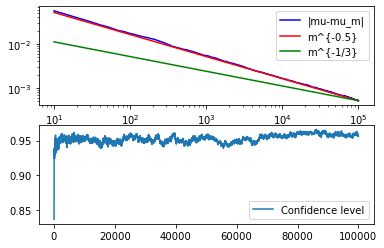

In [50]:
cconflevel(-2/5,100000,1000)

Run the above mentioned algorithm $K=10^3$ times and plot $M$ on the horizontal axis and the average of $|\mu-\bar{Y}_M|$ over all $K$ runs on the vertical axis, using logarithmic scale for both the axis. Compare it with the line $CM^{-\frac{1}{2}}$.

Plot your results with $M$ on the horizontal axis, and the percentage of how often $\mu\in[a_M,b_M]$ over all $K$ runs on the vertical axis.

It is clear from the graph that the the average error after $K=1,000$ runs almost coincides with the line $CM^{-\frac{1}{2}}$, which is what theory suggests. From the confidence level plot, it is clear that the level stabilizes around 0.95 as $M$ grows for the CLT bounds.